# 📊 Indeed Job Market Analysis
**Author:** Alvin Ong <br>
**Tools:** Pandas, Matplotlib, Seaborn <br>
**Objective:** A data analysis project that explores job postings using web-scraped data.

### 📌 1. Import Libraries

In [34]:
# importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string
import re

### 📌 2. Load Data from CSV

In [2]:
# Load Data
df = pd.read_csv("cleaned_scraped_jobs.csv")

# Display first few rows
display(df.head())

,title,company,location,salary,min_salary,max_salary,salary_type,description
0,Data Analyst,St.Hua Private School,Singapore 600131,NaN,NaN,NaN,Unknown,Familiarity with PowerBI and /or Tableau for d...
1,Data Analyst (Marketing Analytics),NTUC Fairprice Co-operative Ltd,Singapore,NaN,NaN,NaN,Unknown,Drive transformational change within the organ...
2,Business & Data Analyst,SWAT Mobility Pte. Ltd.,Singapore,NaN,NaN,NaN,Unknown,Create & maintain data processing pipelines to...
3,Data Analyst,Crown DIgital,Singapore,NaN,NaN,NaN,Unknown,Excellent knowledge of data analysis technique...
4,Data Analyst,User Experience Researchers Pte Ltd,Singapore,5000 - 9000 a month,5000.0,9000.0,month,Develop and maintain data models and schemas t...


### 📖 2. Data Summary

In [3]:
# Summary statistics
display(df.describe(include='all'))

,title,company,location,salary,min_salary,max_salary,salary_type,description
count,150,150,150,13,13.000000,13.000000,150,150
unique,91,93,28,11,NaN,NaN,3,120
top,Data Analyst,Shopee,Singapore,4500 - 5000 a month,NaN,NaN,Unknown,Assist in data analysis efforts to uncover ins...
freq,16,8,102,2,NaN,NaN,137,3
mean,NaN,NaN,NaN,NaN,11830.769231,16369.230769,NaN,NaN
std,NaN,NaN,NaN,NaN,21763.822604,27717.725514,NaN,NaN
min,NaN,NaN,NaN,NaN,3000.000000,5000.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,4500.000000,5800.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,5000.000000,9000.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,8000.000000,12000.000000,NaN,NaN


#### Summary of the Dataset

##### The dataset contains job postings with the following columns:

- title: Job title

- company: Company name

- location: Job location

- salary: Salary range

- min_salary: Minimum salary

- max_salary: Maximum salary

- salary_type: Type of salary (e.g., monthly, yearly)

- description: Job description

#### Analysis of Summary Statistics

- The dataset has 150 entries, with 91 unique job titles and 93 unique companies.

- The most common job title is "Data Analyst," appearing 16 times.

- The most frequent company is "Shopee," with 8 job postings.

- Salary data is sparse, with only 13 entries having salary information.

# Exploratory Data Analysis (EDA)

Understanding the job market trends by analyzing the scraped job data.

## 1. Top Hiring Companies

We analyze the companies that have the most job postings to identify major recruiters in the industry.

🔍 **Why This Matters:** By identifying companies with the most job postings, we gain insights into the industries and organizations actively hiring data professionals.

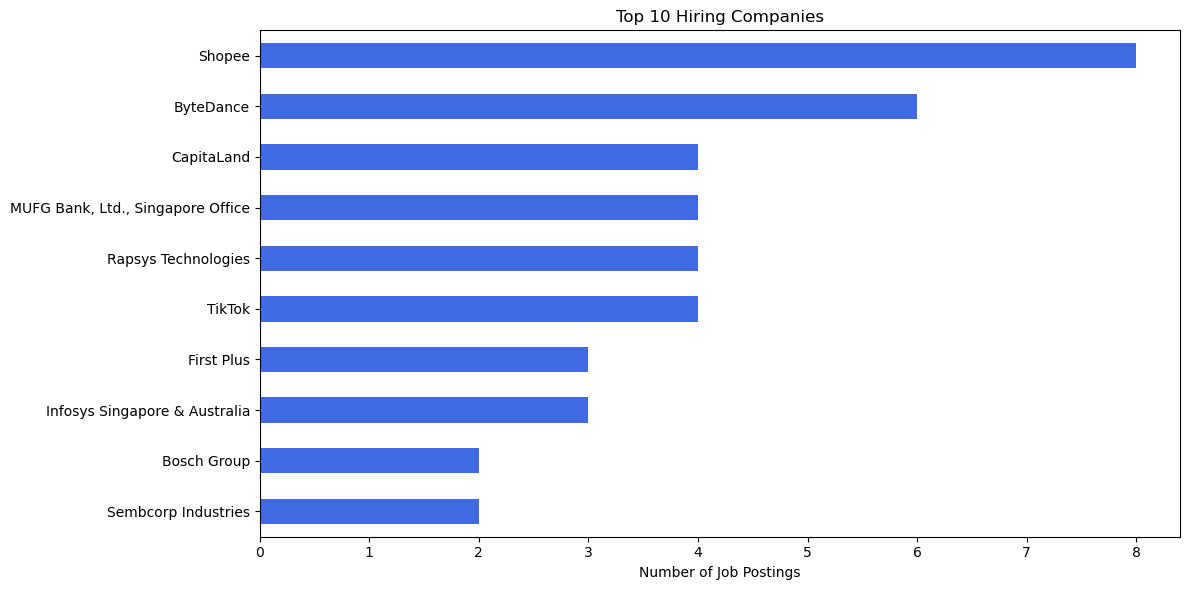

In [18]:
plt.style.use('seaborn-darkgrid')  # Improve plot aesthetics
plt.figure(figsize=(12, 6))
df['company'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', color='royalblue')
plt.title("Top 10 Hiring Companies")
plt.xlabel("Number of Job Postings")
plt.ylabel(None)
plt.tight_layout()
plt.show()

### Analysis of Top Hiring Companies

- **Shopee** is the top hiring company with 8 job postings, followed by **NTUC Fairprice Co-operative Ltd** and **SWAT Mobility Pte. Ltd**.

- The top 10 companies account for a significant portion of the job postings, indicating that these companies are actively hiring in the data analyst field.

## 2. Most Common Job Titles

Examining the most frequently appearing job titles to understand the demand for different roles.

💼 **Key Takeaway:** Understanding frequently listed job titles helps job seekers identify in-demand roles and align their skill sets accordingly.

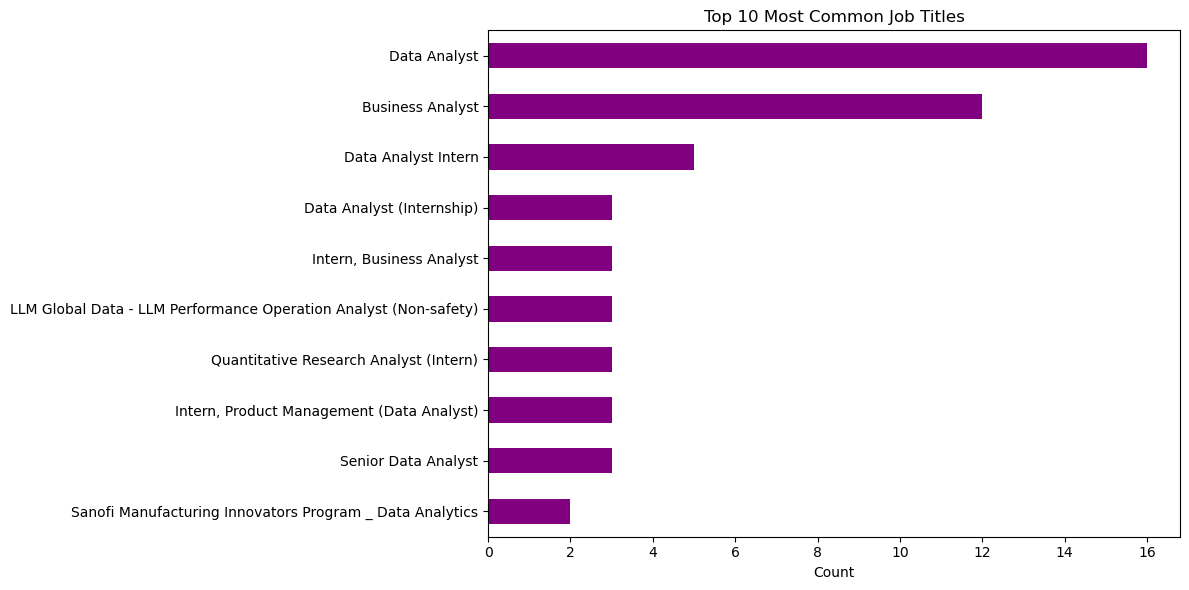

In [20]:
plt.style.use('seaborn-darkgrid')  # Improve plot aesthetics
plt.figure(figsize=(12, 6))
df['title'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', color='purple')
plt.title("Top 10 Most Common Job Titles")
plt.xlabel("Count")
plt.ylabel(None)
plt.tight_layout()
plt.show()

### Analysis of Most Common Job Titles

- The most common job title is **"Data Analyst"** which appears 16 times.

- Other frequent job titles include **"Data Analyst (Marketing Analytics)"** and **"Business & Data Analyst."**.

- This indicates a high demand for data analysts in various specializations, such as marketing and business analysis.

## 3. Job Description Analysis - Keyword Frequency

We extract key terms from job descriptions to see which skills and qualifications are most sought after.

📌 **Why Keyword Analysis?** Analyzing frequently mentioned words in job descriptions reveals essential skills, tools, and qualifications employers are looking for. This can help job seekers tailor their resumes and learning paths accordingly.

In [24]:
# Define important technical skills for data analysts
tech_skills = [
    'sql', 'python', 'r', 'powerbi', 'tableau', 'excel', 
    'java', 'javascript', 'js', 'c++', 'c#', 'csharp',
    'aws', 'azure', 'gcp', 'cloud',
    'hadoop', 'spark', 'scala', 
    'sas', 'spss', 'matlab',
    'tensorflow', 'pytorch', 'keras',
    'nosql', 'mongodb', 'postgresql', 'mysql', 'oracle',
    'git', 'docker', 'kubernetes',
    'power bi', 'microsoft power bi',  # Include variations
    'machine learning', 'ml', 'ai', 'artificial intelligence',
    'data science', 'data analysis', 'data analytics',
    'business intelligence', 'bi',
    'linux', 'unix', 'bash',
    'etl', 'data warehouse',
    'pandas', 'numpy', 'scikit-learn', 'scipy',
    'powerpoint', 'word', 'looker', 'qlik',
    'snowflake', 'redshift', 'bigquery',
    'airflow', 'dbt', 'alteryx'
]

In [26]:
# Function to count skills in a text
def count_skills(text):
    if not isinstance(text, str):
        return []
    
    text = text.lower()
    found_skills = []
    
    # Check for each skill
    for skill in tech_skills:
        # Use word boundaries to find whole words only
        # This avoids counting "R" in every word and similar issues
        pattern = r'\b' + re.escape(skill) + r'\b'
        if re.search(pattern, text):
            found_skills.append(skill)
    
    return found_skills

# Process all job descriptions and count skills
all_skills = []
for description in df['description']:  # Replace with your column name
    all_skills.extend(count_skills(description))

# Count skill frequencies
skill_counts = Counter(all_skills)

C:\Users\alvin\AppData\Local\Temp\ipykernel_28524\1504782663.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skill_df['Count'].head(20), y=skill_df['Skill'].head(20), palette='viridis')


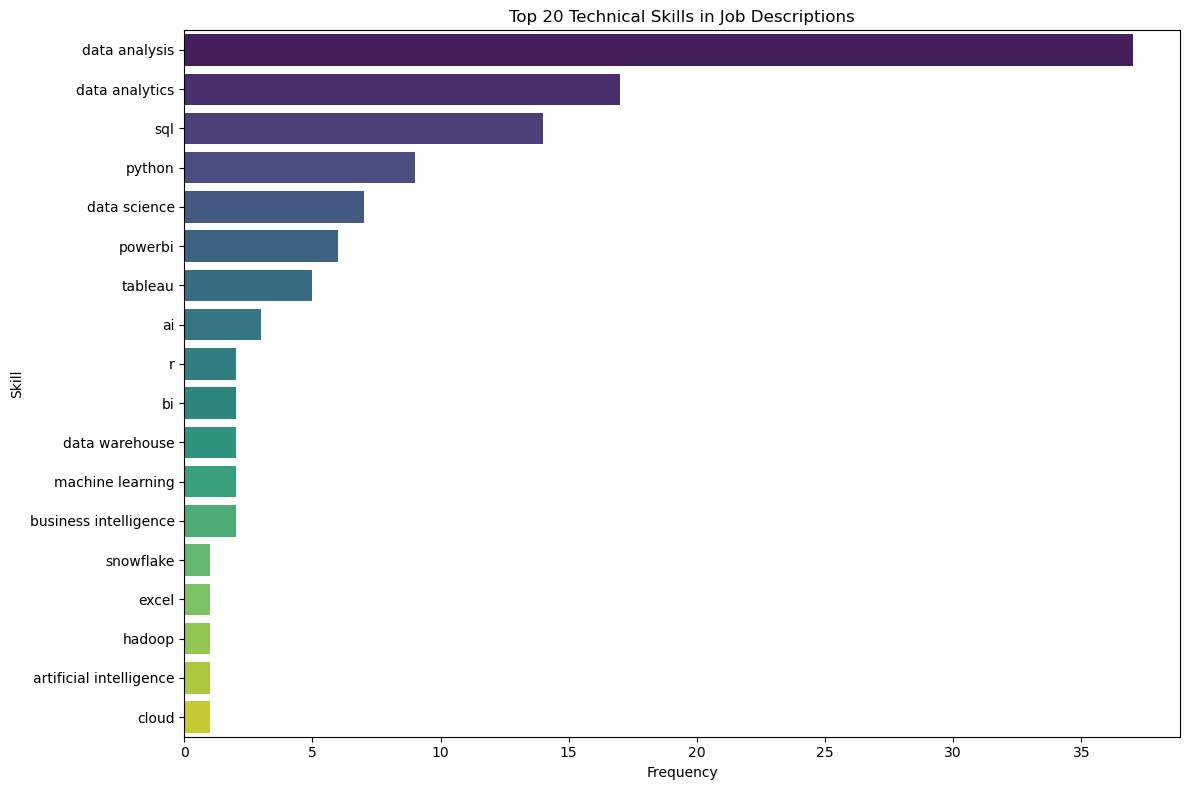

In [66]:
plt.style.use('seaborn-darkgrid')  # Improve plot aesthetics
# Convert to DataFrame and plot
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count']).sort_values(by='Count', ascending=False)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x=skill_df['Count'].head(20), y=skill_df['Skill'].head(20), palette='viridis')
plt.title("Top 20 Technical Skills in Job Descriptions")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()

# Save to CSV
skill_df.to_csv("skill_frequency.csv", index=False)

### Analysis of Job Descriptions

- The most common skills in job descriptions, such as **SQL**, **Python**, **PowerBI** and **Tableau**.

- The most common terms were **"data analysis"**, **"data analytics"**. **"data science"**.

- This suggests that employers are looking for candidates with strong **SQL** skills and relevant experience in **data analysis**.

### **Key Takeaways**

- Top hiring companies include **Shopee**, **NTUC Fairprice Co-operative Ltd**, and **SWAT Mobility Pte. Ltd**.

- The most common job titles are **"Data Analyst"**, **"Data Analyst (Marketing Analytics)"** and **"Business & Data Analyst"**.

- Job descriptions emphasize the need for **technical skills** and experience in **data analysis**.